In [70]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import datetime as dt
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
import statsmodels.formula.api as smf
import fredapi
import dill

In [71]:
sys.path.append('../../../library/metrics/metrics/')
import metrics
import importlib
importlib.reload(metrics)

<module 'metrics' from '../../../library/metrics/metrics\\metrics.py'>

In [72]:
%matplotlib inline

In [73]:
df_var = pd.read_excel('./data/in/GK2015_data.xlsx',sheet_name='VAR_data',index_col=[0,1],parse_dates=True)
df_ins = pd.read_excel('./data/in/GK2015_data.xlsx',sheet_name='IV_data',index_col=[0,1],parse_dates=True)
# feed_md

In [74]:
df = df_var.join(df_ins,how='outer')
df.index = pd.DatetimeIndex([dt.date(row[0].year,row[1],1) for row in df.index],freq='MS')
df.loc[df.loc[:,'ff4_tc']>1000,'ff4_tc'] = np.nan
# df

In [75]:
var_names = ['logip','logcpi','gs1','ebp']
var_descs = ['Industrical production','Price level','1-year yield','Credit spread']
sample = ('1991-01-01','2018-12-01')
full_sample = ('1980-07-01','2012-06-01')
nL = 12
nH = 48
ci = 'wbs'
nR = 1000

In [76]:
importlib.reload(metrics)

<module 'metrics' from '../../../library/metrics/metrics\\metrics.py'>

In [77]:
Mdl1 = metrics.varm(df,nL=nL,var_names=var_names)

In [78]:
Mdl1.irf(nH,method='ch',impulse=0.25,ci=ci,nR=nR)

 Bootstrap 1000/1000



In [79]:
Mdl1.irf(nH,method='iv',idv=[2],ins_names=['ff4_tc'],impulse=0.25,ci=ci,nR=nR)

 Bootstrap 1000/1000



In [80]:
import matplotlib
colors = [matplotlib.colors.to_rgb(c) for c in matplotlib.pyplot.rcParams['axes.prop_cycle'].by_key()['color']]
mpl.rcParams.update({'font.size': 10})
# colors

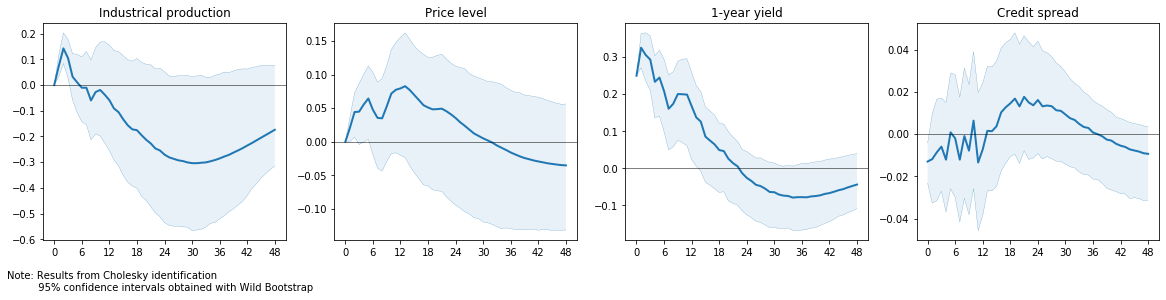

In [83]:
for ids in [2]:
    fig, axes = mpl.subplots(1,4,figsize=(20,4))
    for idp,idr in enumerate([0,1,2,3]):
        axes[idp].plot(Mdl1.irfs.ch.ir.mean[:,idr,ids],color=colors[0],lw=2,label=var_descs[idr]);
        axes[idp].plot(Mdl1.irfs.ch.ir.q025[:,idr,ids],color=colors[0],lw=0.2,ls='-');
        axes[idp].plot(Mdl1.irfs.ch.ir.q975[:,idr,ids],color=colors[0],lw=0.2,ls='-');
        axes[idp].fill_between(range(nH+1),Mdl1.irfs.ch.ir.q025[:,idr,ids],Mdl1.irfs.ch.ir.q975[:,idr,ids],facecolor=colors[0], alpha=0.10)
        axes[idp].axhline(0,color='k',lw=0.5);
        axes[idp].set_xticks(range(0,nH+1,6))
#         axes[idp].legend()
        axes[idp].set_title(var_descs[idr]);
#     fig.suptitle('Shock to Fed funds rate vs '+var_descs_1[ids],y=1.02)
    fig.text(0.1,-0.05,'Note: Results from Cholesky identification\n          95% confidence intervals obtained with Wild Bootstrap');
#     fig.savefig('./figures/png/Mdl1_'+str(ids)+'.png',bbox_inches='tight')
#     fig.savefig('./figures/pdf/Mdl1_'+str(ids)+'.pdf',bbox_inches='tight')

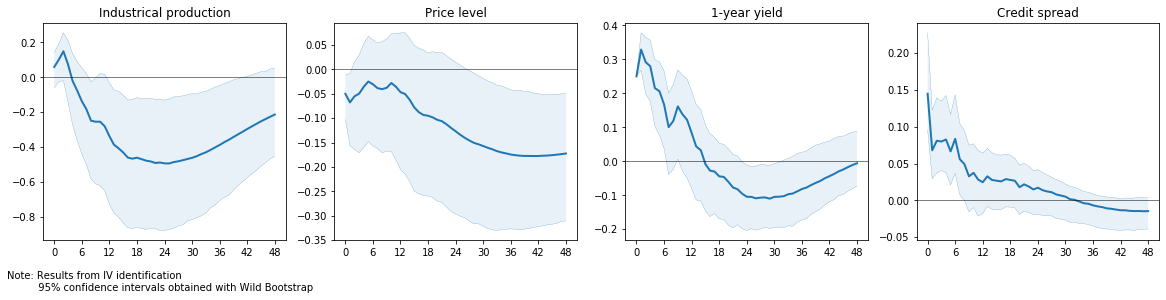

In [86]:
for ids in [2]:
    fig, axes = mpl.subplots(1,4,figsize=(20,4))
    for idp,idr in enumerate([0,1,2,3]):
        axes[idp].plot(Mdl1.irfs.iv.ir.mean[:,idr,ids],color=colors[0],lw=2,label=var_descs[idr]);
        axes[idp].plot(Mdl1.irfs.iv.ir.q025[:,idr,ids],color=colors[0],lw=0.2,ls='-');
        axes[idp].plot(Mdl1.irfs.iv.ir.q975[:,idr,ids],color=colors[0],lw=0.2,ls='-');
        axes[idp].fill_between(range(nH+1),Mdl1.irfs.iv.ir.q025[:,idr,ids],Mdl1.irfs.iv.ir.q975[:,idr,ids],facecolor=colors[0], alpha=0.10)
        axes[idp].axhline(0,color='k',lw=0.5);
        axes[idp].set_xticks(range(0,nH+1,6))
#         axes[idp].legend()
        axes[idp].set_title(var_descs[idr]);
#     fig.suptitle('Shock to Fed funds rate vs '+var_descs_1[ids],y=1.02)
    fig.text(0.1,-0.05,'Note: Results from IV identification\n          95% confidence intervals obtained with Wild Bootstrap');
#     fig.savefig('./figures/png/Mdl1_'+str(ids)+'.png',bbox_inches='tight')
#     fig.savefig('./figures/pdf/Mdl1_'+str(ids)+'.pdf',bbox_inches='tight')

In [87]:
Mdl2 = metrics.varm(df,nL=nL,var_names=var_names[:3])

In [88]:
Mdl2.irf(nH,method='ch',impulse=0.25,ci=None)

In [89]:
Mdl2.irf(nH,method='iv',idv=[2],ins_names=['ff4_tc'],impulse=0.25,ci=ci,nR=nR)

 Bootstrap 1000/1000



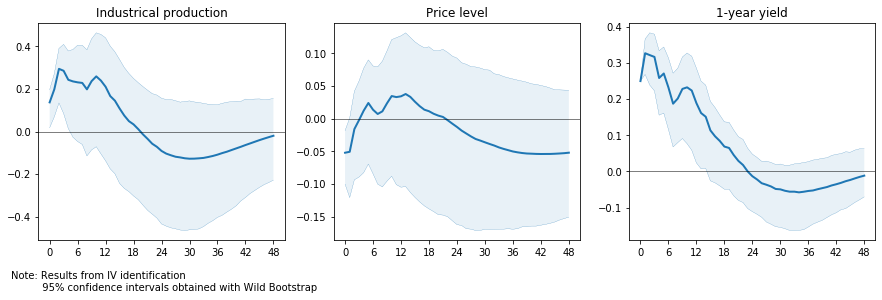

In [98]:
for ids in [2]:
    fig, axes = mpl.subplots(1,3,figsize=(15,4))
    for idp,idr in enumerate([0,1,2]):
        axes[idp].plot(Mdl2.irfs.iv.ir.mean[:,idr,ids],color=colors[0],lw=2);
        axes[idp].plot(Mdl2.irfs.iv.ir.q025[:,idr,ids],color=colors[0],lw=0.2,ls='-');
        axes[idp].plot(Mdl2.irfs.iv.ir.q975[:,idr,ids],color=colors[0],lw=0.2,ls='-');
        axes[idp].fill_between(range(nH+1),Mdl2.irfs.iv.ir.q025[:,idr,ids],Mdl2.irfs.iv.ir.q975[:,idr,ids],facecolor=colors[0], alpha=0.10)
        axes[idp].axhline(0,color='k',lw=0.5);
        axes[idp].set_xticks(range(0,nH+1,6))
#         axes[idp].legend()
        axes[idp].set_title(var_descs[idr]);
#     fig.suptitle('Shock to Fed funds rate vs '+var_descs_1[ids],y=1.02)
    fig.text(0.1,-0.05,'Note: Results from IV identification\n          95% confidence intervals obtained with Wild Bootstrap');
#     fig.savefig('./figures/png/Mdl1_'+str(ids)+'.png',bbox_inches='tight')
#     fig.savefig('./figures/pdf/Mdl1_'+str(ids)+'.pdf',bbox_inches='tight')

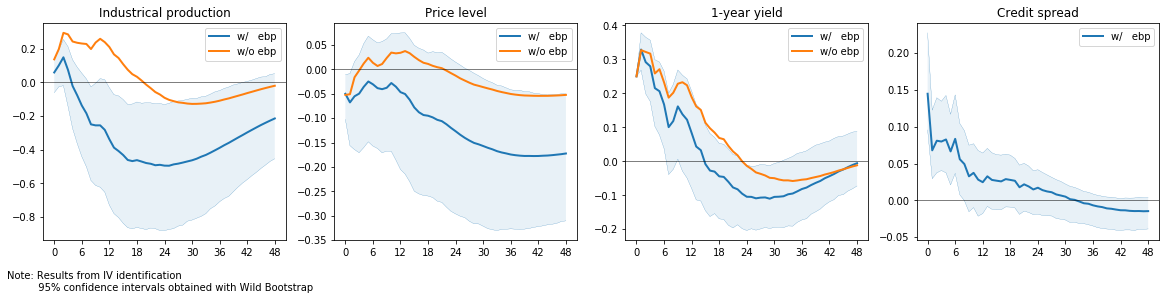

In [99]:
for ids in [2]:
    fig, axes = mpl.subplots(1,4,figsize=(20,4))
    for idp,idr in enumerate([0,1,2,3]):
        axes[idp].plot(Mdl1.irfs.iv.ir.mean[:,idr,ids],color=colors[0],lw=2,label='w/   ebp');
        axes[idp].plot(Mdl1.irfs.iv.ir.q025[:,idr,ids],color=colors[0],lw=0.2,ls='-');
        axes[idp].plot(Mdl1.irfs.iv.ir.q975[:,idr,ids],color=colors[0],lw=0.2,ls='-');
        axes[idp].fill_between(range(nH+1),Mdl1.irfs.iv.ir.q025[:,idr,ids],Mdl1.irfs.iv.ir.q975[:,idr,ids],facecolor=colors[0], alpha=0.10)
        if idr <= 2:
            axes[idp].plot(Mdl2.irfs.iv.ir.mean[:,idr,ids],color=colors[1],lw=2,label='w/o ebp');
        axes[idp].axhline(0,color='k',lw=0.5);
        axes[idp].set_xticks(range(0,nH+1,6))
        axes[idp].legend()
        axes[idp].set_title(var_descs[idr]);
#     fig.suptitle('Shock to Fed funds rate vs '+var_descs_1[ids],y=1.02)
    fig.text(0.1,-0.05,'Note: Results from IV identification\n          95% confidence intervals obtained with Wild Bootstrap');
#     fig.savefig('./figures/png/Mdl1_'+str(ids)+'.png',bbox_inches='tight')
#     fig.savefig('./figures/pdf/Mdl1_'+str(ids)+'.pdf',bbox_inches='tight')